In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

#from tensorflow.compat.v1.keras.backend import get_session
#tf.compat.v1.disable_v2_behavior()

file_path = 'EGLL_2023-04-01_00-00_till_2024-03-31_23-30_cleaned_RECAT_PredRunway.csv'
df = pd.read_csv(file_path)
df=df.sort_values(by='TimeStamp')

df_model1 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam', 'RECAT_EU_A', 'RECAT_EU_B', 'RECAT_EU_C','RECAT_EU_D','RECAT_EU_E','RECAT_EU_F','RECAT_EU_G', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -0', 'Wind at -0', 'Precip at -0', 'Freezing at -0','Phenomena at -0', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -0','Holding flights at -0', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Crosswind Component at -0', 'Headwind Component at -0','No of Landings 1HR at -0', 'Ground Speed at -0', 'Track at -0','Altitude at -0', 'Departures delayIndex at -0','Arrivals numCancelled at -0', 'Arrivals delayIndex at -0']]
df_model2 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam',  'RECAT_EU_A', 'RECAT_EU_B', 'RECAT_EU_C','RECAT_EU_D','RECAT_EU_E','RECAT_EU_F','RECAT_EU_G', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -30', 'Wind at -30', 'Precip at -30', 'Freezing at -30','Phenomena at -30', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -30','Holding flights at -30', 'Runway 09L predicted at -30','Runway 09R predicted at -30', 'Runway 27L predicted at -30','Runway 27R predicted at -30','Crosswind Component at -30', 'Headwind Component at -30','No of Landings 1HR at -30', 'Ground Speed at -30', 'Track at -30','Altitude at -30', 'Departures delayIndex at -30','Arrivals numCancelled at -30', 'Arrivals delayIndex at -30']]
df_model3 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam',  'RECAT_EU_A', 'RECAT_EU_B', 'RECAT_EU_C','RECAT_EU_D','RECAT_EU_E','RECAT_EU_F','RECAT_EU_G', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -60', 'Wind at -60', 'Precip at -60', 'Freezing at -60','Phenomena at -60', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -60','Holding flights at -60','Runway 09L predicted at -60','Runway 09R predicted at -60', 'Runway 27L predicted at -60','Runway 27R predicted at -60','Crosswind Component at -60', 'Headwind Component at -60','No of Landings 1HR at -60', 'Ground Speed at -60', 'Track at -60','Altitude at -60', 'Departures delayIndex at -60','Arrivals numCancelled at -60', 'Arrivals delayIndex at -60']]
df_model_all=df[['Holding Time (minutes)','Big', 'Ock', 'Bov', 'Lam',  'RECAT_EU_A', 'RECAT_EU_B', 'RECAT_EU_C','RECAT_EU_D','RECAT_EU_E','RECAT_EU_F','RECAT_EU_G', 'Engine Jet', 'Engine Turboprop/shaft',
                'Ceiling at -0', 'Wind at -0', 'Precip at -0', 'Freezing at -0','Phenomena at -0','Ceiling at -30', 'Wind at -30', 'Precip at -30', 'Freezing at -30','Phenomena at -30','Ceiling at -60', 'Wind at -60', 'Precip at -60', 'Freezing at -60','Phenomena at -60', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -0','Holding flights at -0', 'Holding flights at -30','Holding flights at -60', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Runway 09L predicted at -30','Runway 09R predicted at -30', 'Runway 27L predicted at -30','Runway 27R predicted at -30', 'Runway 09L predicted at -60','Runway 09R predicted at -60', 'Runway 27L predicted at -60',
                 'Runway 27R predicted at -60','Crosswind Component at -0', 'Headwind Component at -0','Crosswind Component at -30', 'Headwind Component at -30','Crosswind Component at -60', 'Headwind Component at -60','No of Landings 1HR at -0', 'No of Landings 1HR at -30','No of Landings 1HR at -60', 'Ground Speed at -0', 'Track at -0',
                'Altitude at -0', 'Ground Speed at -30', 'Track at -30','Altitude at -30', 'Ground Speed at -60', 'Track at -60','Altitude at -60', 'Departures delayIndex at -0','Arrivals numCancelled at -0', 'Arrivals delayIndex at -0','Departures delayIndex at -30', 'Arrivals numCancelled at -30','Arrivals delayIndex at -30', 'Departures delayIndex at -60','Arrivals numCancelled at -60', 'Arrivals delayIndex at -60']]

In [3]:
h=df.columns
h

Index(['Unnamed: 0', 'Flight Number', 'Holding Time (minutes)', 'Type Code',
       'Time over fix', 'Big', 'Ock', 'Bov', 'Lam', 'WTC L',
       ...
       'RECAT_EU_F', 'RECAT_EU_G', 'Runway 09L predicted at -30',
       'Runway 09R predicted at -30', 'Runway 27L predicted at -30',
       'Runway 27R predicted at -30', 'Runway 09L predicted at -60',
       'Runway 09R predicted at -60', 'Runway 27L predicted at -60',
       'Runway 27R predicted at -60'],
      dtype='object', length=106)

In [ ]:

data=df_model1
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2 ,random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [4]:
# With Transformer
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data=df_model1

# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features (X) and target variable (y)
X = data.drop(columns=['Holding Time (minutes)'])  # Features
y = data['Holding Time (minutes)']                 # Target

# Step 1: Apply Power Transformation
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Step 2: Standardize (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_transformed)

# Step 3: Min-Max Scaling (scale to range [0, 1])
scaler_minmax = MinMaxScaler()
X_final = scaler_minmax.fit_transform(X_standardized)



# Create sequences for LSTM
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_standardized, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42
)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], 
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\71563044.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)
C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 11.5388 - val_loss: 8.9407
Epoch 2/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 9.1407 - val_loss: 8.6277
Epoch 3/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.8634 - val_loss: 8.6423
Epoch 4/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8413 - val_loss: 8.5688
Epoch 5/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 8.7893 - val_loss: 8.5287
Epoch 6/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.7702 - val_loss: 8.6383
Epoch 7/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.5989 - val_loss: 8.4480
Epoch 8/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.6003 - val_loss: 8.4481
Epoch 9/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.4917 - val_loss: 8.4598
Epoch 10/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.4100 - val_loss: 8.4104
Epoch 11/100
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 8.4741 - val_loss: 8.4278
Epoch 12/100
5575

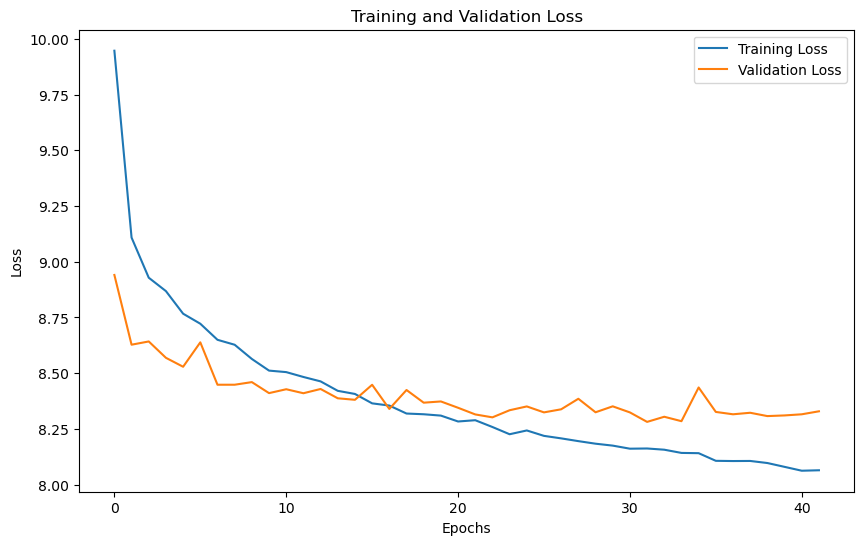

In [5]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

X_train_flat shape: (178379, 42)
X_test_flat shape: (44595, 42)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 
Calculating SHAP values on test subset...


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3313/3313 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step
SHAP values shape: (10, 42)


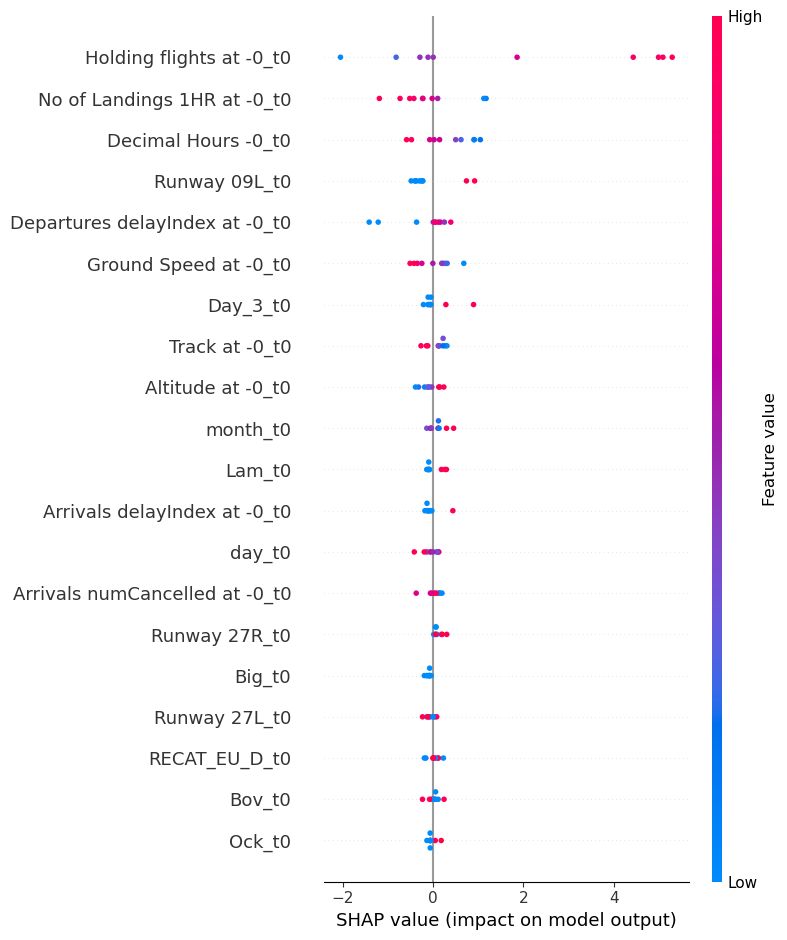

In [6]:
import shap
plt.clf()
#PREPARE FLATTENED DATA FOR SHAP
# LSTM expects 3D input (samples, time_steps, features),
# while KernelExplainer expects 2D (samples, features).

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

#  GENERATE FEATURE NAMES 
# Create descriptive names for each time-step × original feature
# We'll retrieve the original DataFrame columns from X before transformations.
original_features = X.columns.tolist()  # e.g. ["FeatureA", "FeatureB", "FeatureC", ...]

feature_names = []
for t in range(time_steps):
    for fcol in original_features:
        feature_names.append(f"{fcol}_t{t}")

# Double-check length matches the flattened dimension
assert len(feature_names) == X_train_flat.shape[1], \
       f"Expected {X_train_flat.shape[1]} feature names, got {len(feature_names)}"

# DEFINE CUSTOM PREDICT FUNCTION FOR SHAP
def predict_function(flat_data):
    # Unflatten to (samples, time_steps, num_features)
    batch_size = flat_data.shape[0]
    reshaped = flat_data.reshape(
        (batch_size, time_steps, X_train.shape[2])
    )
    return model.predict(reshaped).flatten()

#CREATE KERNEL EXPLAINER
# Use a small random subset of X_train_flat as background data
np.random.seed(42)
idx = np.random.choice(X_train_flat.shape[0], size=50, replace=False)
background_data = X_train_flat[idx]

explainer = shap.KernelExplainer(
    model = predict_function,
    data  = background_data,
    link  = "identity"  # for regression
)

#COMPUTE SHAP VALUES
# For demo, pick the first 10 samples of X_test_flat
test_subset = X_test_flat[:10]

print("Calculating SHAP values on test subset...")
shap_values = explainer.shap_values(test_subset)

# shap_values has shape (num_samples, num_features) => (10, time_steps * n_original_features)
print("SHAP values shape:", np.array(shap_values).shape)

#VISUALIZE SHAP SUMMARY
shap.summary_plot(shap_values, 
                  test_subset, 
                  feature_names=feature_names,
                  show=False)
plt.savefig('plots/LSTM/model1/Summary_Plot.png')

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step
1394/1394 

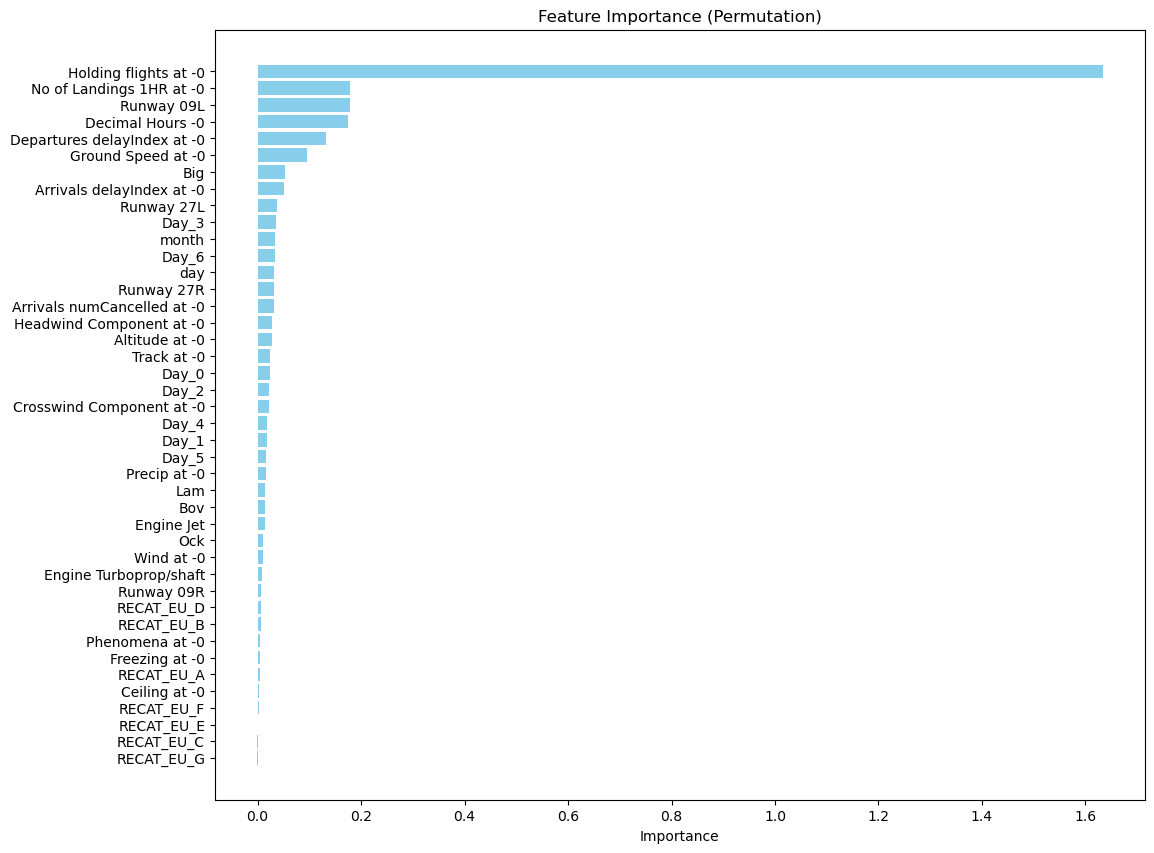

In [8]:

# Plot feature importance as a horizontal bar chart
features, importances = zip(*[(str(f), float(i)) for f, i in importances])
plt.figure(figsize=(12, 10))
plt.barh(list(features), list(importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [9]:
data=df_model2
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\3591089260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/150


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5575/5575 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 15.4948 - val_loss: 12.9198
Epoch 2/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.2662 - val_loss: 12.7579
Epoch 3/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.0602 - val_loss: 12.8276
Epoch 4/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.8486 - val_loss: 12.5727
Epoch 5/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.8620 - val_loss: 12.4876
Epoch 6/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.6780 - val_loss: 12.4134
Epoch 7/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.6197 - val_loss: 12.3084
Epoch 8/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.4776 - val_loss: 12.3035
Epoch 9/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.3142 - val_loss: 12.2489
Epoch 10/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.3310 - val_loss: 12.2562
Epoch 11/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.3192 - val_loss: 12.0654
Epoch 12/

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\3591089260.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


RMSE: 5.267233957537396
MAE: 2.4450604530768523
MAPE: inf%


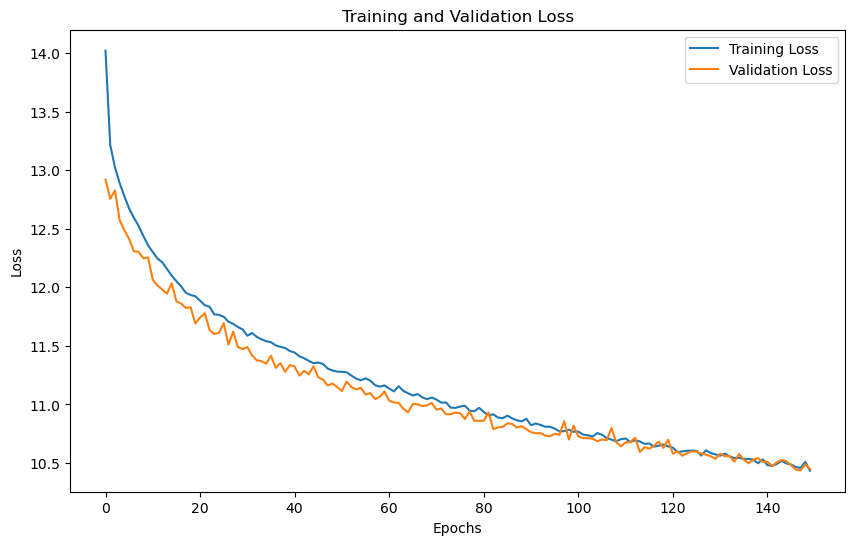

In [10]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# With Transformer
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data=df_model2

# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features (X) and target variable (y)
X = data.drop(columns=['Holding Time (minutes)'])  # Features
y = data['Holding Time (minutes)']                 # Target

# Step 1: Apply Power Transformation
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Step 2: Standardize (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_transformed)

# Step 3: Min-Max Scaling (scale to range [0, 1])
scaler_minmax = MinMaxScaler()
X_final = scaler_minmax.fit_transform(X_standardized)



# Create sequences for LSTM
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_standardized, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42
)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=150, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], 
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\1315016620.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)
C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 15.0502 - val_loss: 12.4106
Epoch 2/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.6424 - val_loss: 12.1363
Epoch 3/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.3992 - val_loss: 11.9398
Epoch 4/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.0157 - val_loss: 11.7800
Epoch 5/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.8604 - val_loss: 11.7715
Epoch 6/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.6841 - val_loss: 11.5950
Epoch 7/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.6201 - val_loss: 11.5225
Epoch 8/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.6223 - val_loss: 11.4794
Epoch 9/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.4329 - val_loss: 11.4098
Epoch 10/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.2221 - val_loss: 11.3860
Epoch 11/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.3175 - val_loss: 11.1

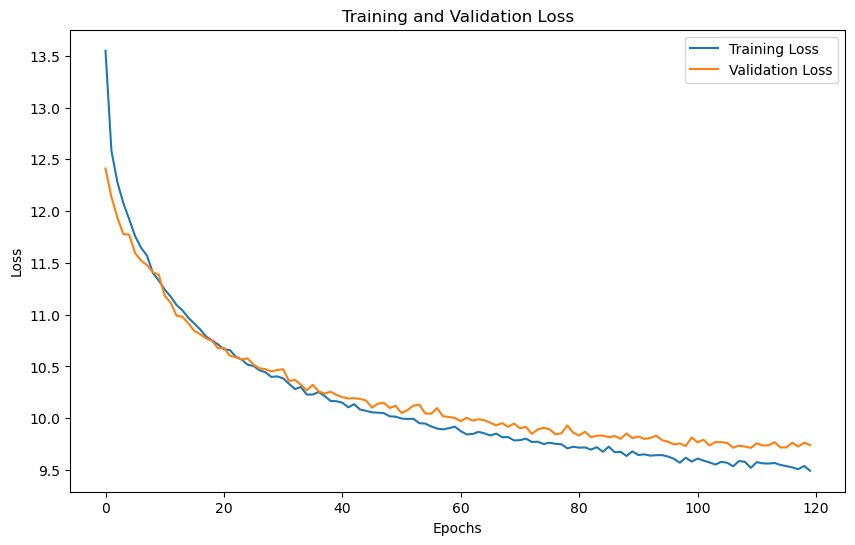

In [12]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

X_train_flat shape: (178379, 42)
X_test_flat shape: (44595, 42)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 
Calculating SHAP values on test subset...


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 3s 766us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 3s 793us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3319/3319 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 706us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3316/3316 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step
SHAP values shape: (10, 42)


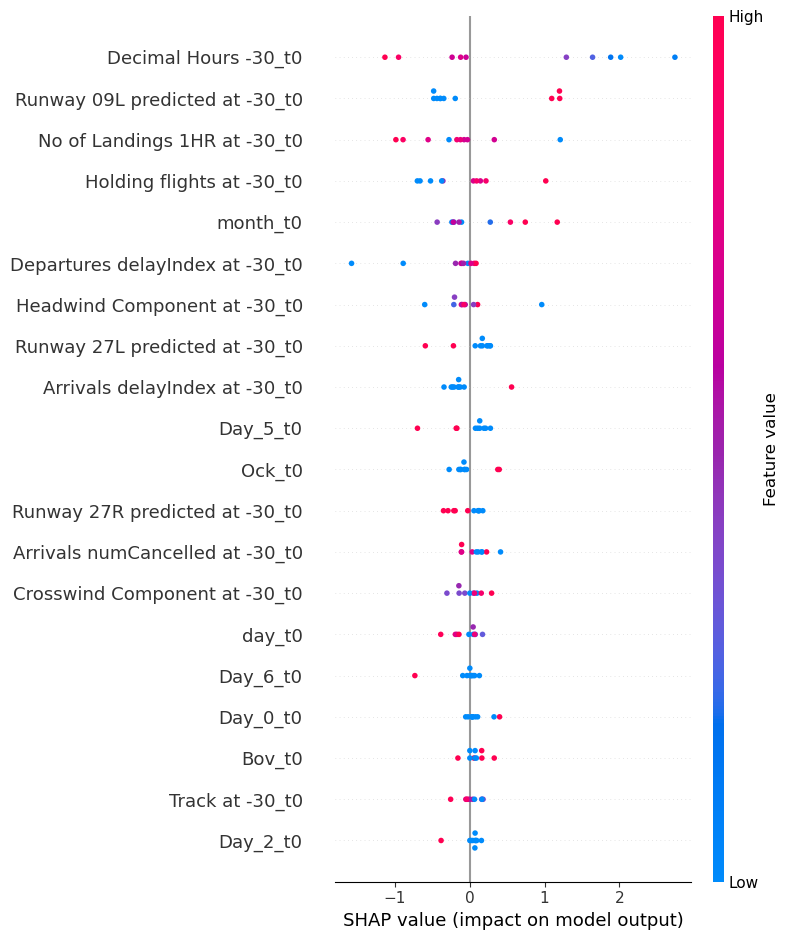

In [13]:
import shap
plt.clf()
#PREPARE FLATTENED DATA FOR SHAP
# LSTM expects 3D input (samples, time_steps, features),
# while KernelExplainer expects 2D (samples, features).

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

#  GENERATE FEATURE NAMES 
# Create descriptive names for each time-step × original feature
# We'll retrieve the original DataFrame columns from X before transformations.
original_features = X.columns.tolist()  # e.g. ["FeatureA", "FeatureB", "FeatureC", ...]

feature_names = []
for t in range(time_steps):
    for fcol in original_features:
        feature_names.append(f"{fcol}_t{t}")

# Double-check length matches the flattened dimension
assert len(feature_names) == X_train_flat.shape[1], \
       f"Expected {X_train_flat.shape[1]} feature names, got {len(feature_names)}"

# DEFINE CUSTOM PREDICT FUNCTION FOR SHAP
def predict_function(flat_data):
    # Unflatten to (samples, time_steps, num_features)
    batch_size = flat_data.shape[0]
    reshaped = flat_data.reshape(
        (batch_size, time_steps, X_train.shape[2])
    )
    return model.predict(reshaped).flatten()

#CREATE KERNEL EXPLAINER
# Use a small random subset of X_train_flat as background data
np.random.seed(42)
idx = np.random.choice(X_train_flat.shape[0], size=50, replace=False)
background_data = X_train_flat[idx]

explainer = shap.KernelExplainer(
    model = predict_function,
    data  = background_data,
    link  = "identity"  # for regression
)

#COMPUTE SHAP VALUES
# For demo, pick the first 10 samples of X_test_flat
test_subset = X_test_flat[:10]

print("Calculating SHAP values on test subset...")
shap_values = explainer.shap_values(test_subset)

# shap_values has shape (num_samples, num_features) => (10, time_steps * n_original_features)
print("SHAP values shape:", np.array(shap_values).shape)

#VISUALIZE SHAP SUMMARY
shap.summary_plot(shap_values, 
                  test_subset, 
                  feature_names=feature_names,
                  show=False)
plt.savefig('plots/LSTM/model2/Summary_Plot.png')

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step
1394/1394 

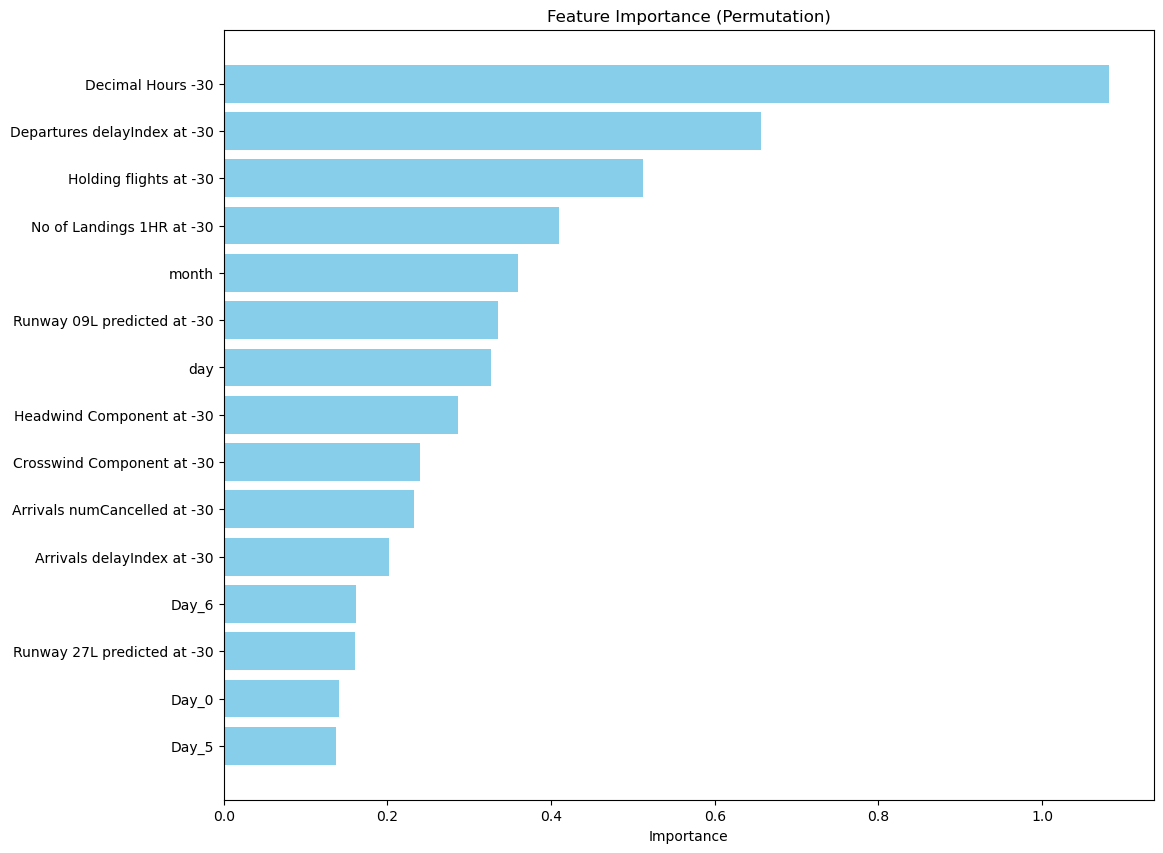

In [15]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [16]:
data=df_model3
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\488788170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/200


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5575/5575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 16.4369 - val_loss: 14.0317
Epoch 2/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14.3657 - val_loss: 13.8857
Epoch 3/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.9793 - val_loss: 13.8498
Epoch 4/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.9021 - val_loss: 13.6906
Epoch 5/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.8418 - val_loss: 13.4747
Epoch 6/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.4637 - val_loss: 13.3029
Epoch 7/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.5295 - val_loss: 13.2239
Epoch 8/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.3706 - val_loss: 13.1474
Epoch 9/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.3430 - val_loss: 13.0046
Epoch 10/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.1649 - val_loss: 12.8793
Epoch 11/200
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 13.0016 - val_loss: 12.8598
Epoch 12

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\488788170.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


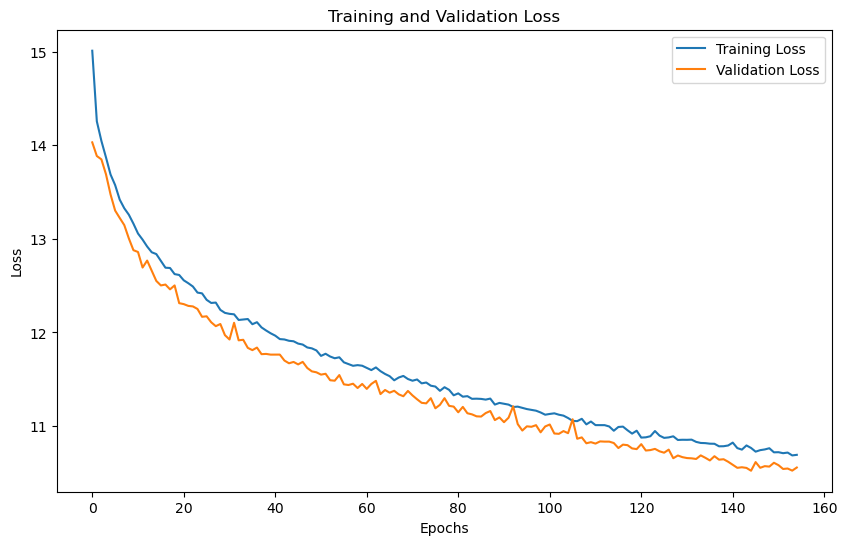

In [17]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# With Transformer
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data=df_model3

# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features (X) and target variable (y)
X = data.drop(columns=['Holding Time (minutes)'])  # Features
y = data['Holding Time (minutes)']                 # Target

# Step 1: Apply Power Transformation
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Step 2: Standardize (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_transformed)

# Step 3: Min-Max Scaling (scale to range [0, 1])
scaler_minmax = MinMaxScaler()
X_final = scaler_minmax.fit_transform(X_standardized)



# Create sequences for LSTM
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_standardized, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42
)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=150, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], 
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\3816734656.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)
C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 15.8968 - val_loss: 13.3751
Epoch 2/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 13.6074 - val_loss: 13.0932
Epoch 3/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.2196 - val_loss: 12.8132
Epoch 4/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.9431 - val_loss: 12.5010
Epoch 5/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.5799 - val_loss: 12.2632
Epoch 6/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.3945 - val_loss: 12.0954
Epoch 7/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.1590 - val_loss: 12.0199
Epoch 8/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 12.0076 - val_loss: 11.8111
Epoch 9/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.8769 - val_loss: 11.7631
Epoch 10/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.7290 - val_loss: 11.6464
Epoch 11/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.7544 - val_loss: 11.5

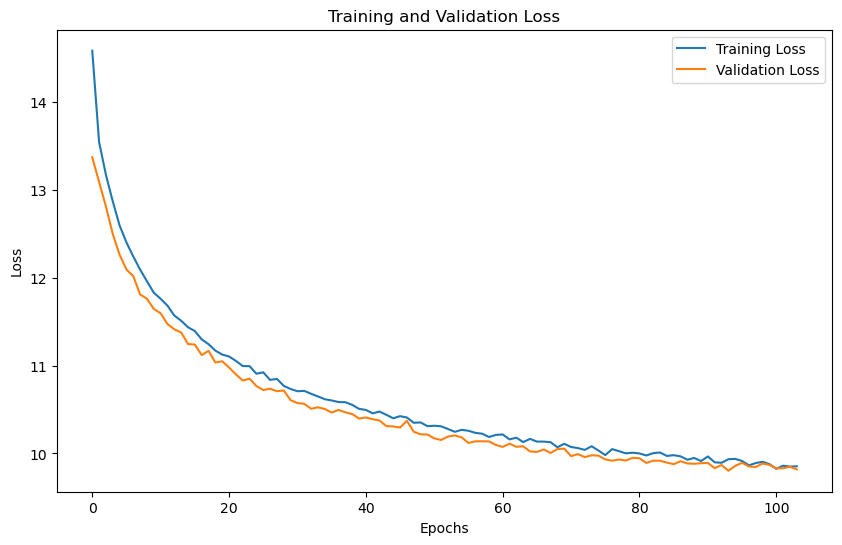

In [19]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

X_train_flat shape: (178379, 42)
X_test_flat shape: (44595, 42)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
Calculating SHAP values on test subset...


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 3s 744us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 706us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step
SHAP values shape: (10, 42)


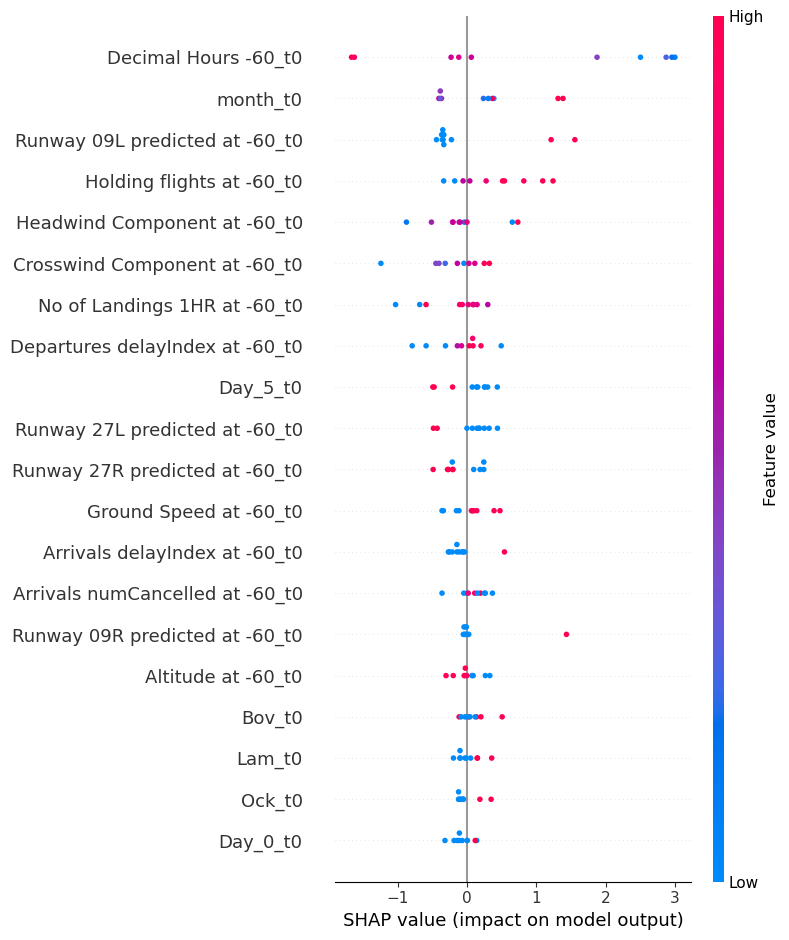

In [20]:
import shap
plt.clf()
#PREPARE FLATTENED DATA FOR SHAP
# LSTM expects 3D input (samples, time_steps, features),
# while KernelExplainer expects 2D (samples, features).

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

#  GENERATE FEATURE NAMES 
# Create descriptive names for each time-step × original feature
# We'll retrieve the original DataFrame columns from X before transformations.
original_features = X.columns.tolist()  # e.g. ["FeatureA", "FeatureB", "FeatureC", ...]

feature_names = []
for t in range(time_steps):
    for fcol in original_features:
        feature_names.append(f"{fcol}_t{t}")

# Double-check length matches the flattened dimension
assert len(feature_names) == X_train_flat.shape[1], \
       f"Expected {X_train_flat.shape[1]} feature names, got {len(feature_names)}"

# DEFINE CUSTOM PREDICT FUNCTION FOR SHAP
def predict_function(flat_data):
    # Unflatten to (samples, time_steps, num_features)
    batch_size = flat_data.shape[0]
    reshaped = flat_data.reshape(
        (batch_size, time_steps, X_train.shape[2])
    )
    return model.predict(reshaped).flatten()

#CREATE KERNEL EXPLAINER
# Use a small random subset of X_train_flat as background data
np.random.seed(42)
idx = np.random.choice(X_train_flat.shape[0], size=50, replace=False)
background_data = X_train_flat[idx]

explainer = shap.KernelExplainer(
    model = predict_function,
    data  = background_data,
    link  = "identity"  # for regression
)

#COMPUTE SHAP VALUES
# For demo, pick the first 10 samples of X_test_flat
test_subset = X_test_flat[:10]

print("Calculating SHAP values on test subset...")
shap_values = explainer.shap_values(test_subset)

# shap_values has shape (num_samples, num_features) => (10, time_steps * n_original_features)
print("SHAP values shape:", np.array(shap_values).shape)

#VISUALIZE SHAP SUMMARY
shap.summary_plot(shap_values, 
                  test_subset, 
                  feature_names=feature_names,
                  show=False)
plt.savefig('plots/LSTM/model3/Summary_Plot.png')

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step
1394/1394 

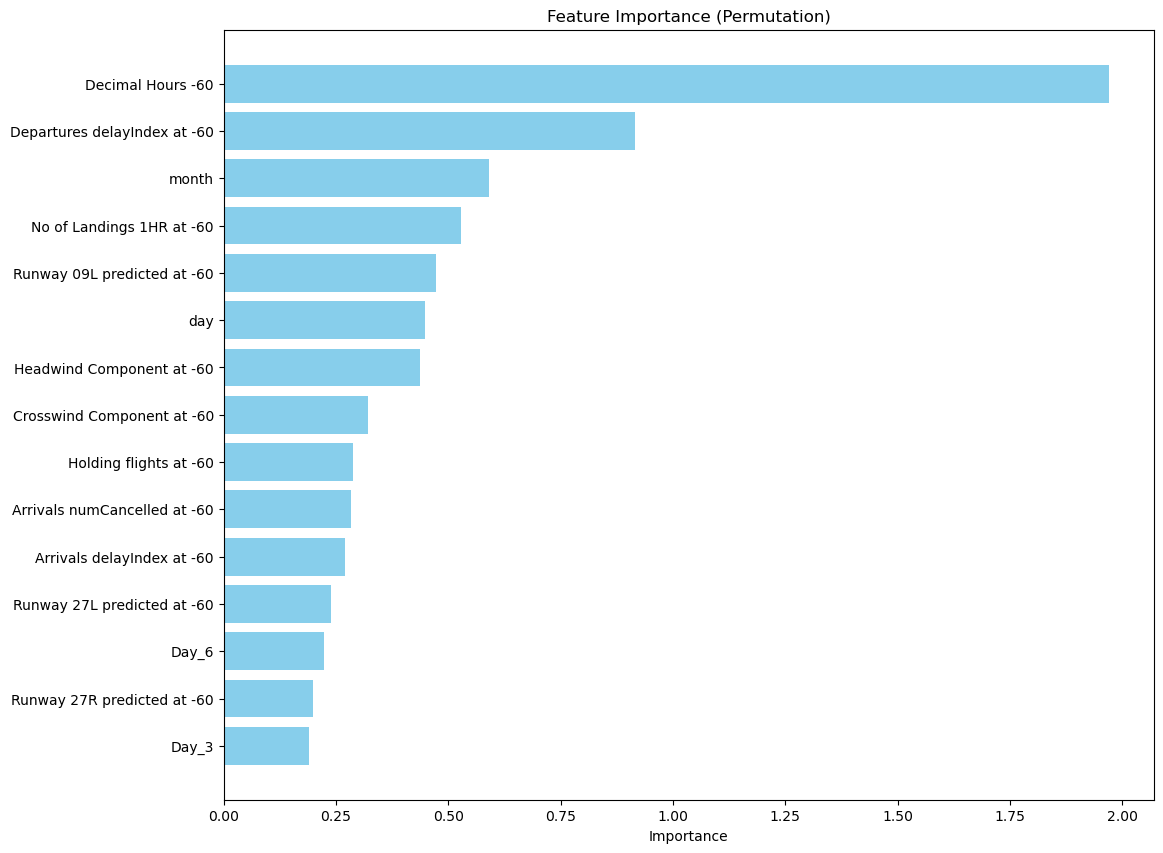

In [22]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [23]:
data=df_model_all
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\1776927486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/150


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5575/5575 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 12.0464 - val_loss: 8.8071
Epoch 2/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9.1267 - val_loss: 8.6936
Epoch 3/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.9357 - val_loss: 8.6587
Epoch 4/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.7992 - val_loss: 8.8137
Epoch 5/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8431 - val_loss: 8.4646
Epoch 6/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8353 - val_loss: 8.5447
Epoch 7/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.7675 - val_loss: 8.6444
Epoch 8/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.6318 - val_loss: 8.4841
Epoch 9/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.5126 - val_loss: 8.5106
Epoch 10/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.6233 - val_loss: 8.3698
Epoch 11/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.6349 - val_loss: 8.4412
Epoch 12/150
5575/5575 ━━━━━━

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\1776927486.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


RMSE: 5.491798577006807
MAE: 2.0481304454063896
MAPE: inf%


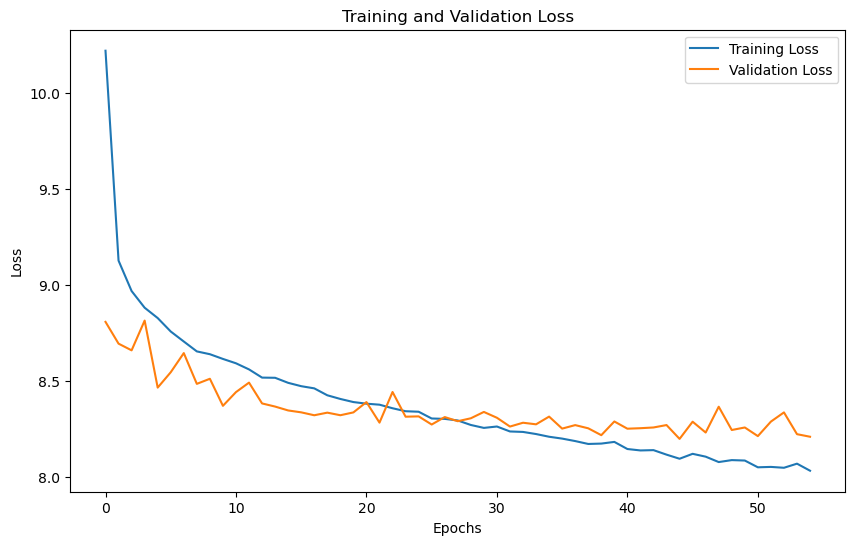

In [24]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# With Transformer
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data=df_model_all

# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features (X) and target variable (y)
X = data.drop(columns=['Holding Time (minutes)'])  # Features
y = data['Holding Time (minutes)']                 # Target

# Step 1: Apply Power Transformation
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Step 2: Standardize (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_transformed)

# Step 3: Min-Max Scaling (scale to range [0, 1])
scaler_minmax = MinMaxScaler()
X_final = scaler_minmax.fit_transform(X_standardized)



# Create sequences for LSTM
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 1
X_sequences, y_sequences = create_sequences(X_standardized, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42
)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=150, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], 
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_28668\2230979104.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)
C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 11.4575 - val_loss: 8.5192
Epoch 2/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.8923 - val_loss: 8.4794
Epoch 3/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.6410 - val_loss: 8.3789
Epoch 4/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.5888 - val_loss: 8.3288
Epoch 5/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.4156 - val_loss: 8.6705
Epoch 6/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.4387 - val_loss: 8.2838
Epoch 7/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.4065 - val_loss: 8.2730
Epoch 8/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.2794 - val_loss: 8.2548
Epoch 9/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.1822 - val_loss: 8.1830
Epoch 10/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.2192 - val_loss: 8.1949
Epoch 11/150
5575/5575 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.1329 - val_loss: 8.2525
Epoch 12/150
5575

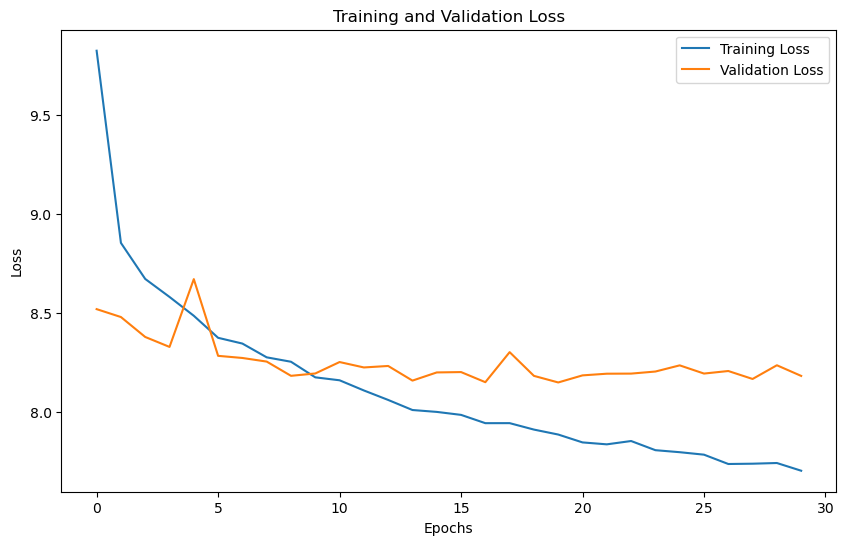

In [26]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

X_train_flat shape: (178379, 80)
X_test_flat shape: (44595, 80)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 
Calculating SHAP values on test subset...


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 3s 746us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 703us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step
SHAP values shape: (10, 80)


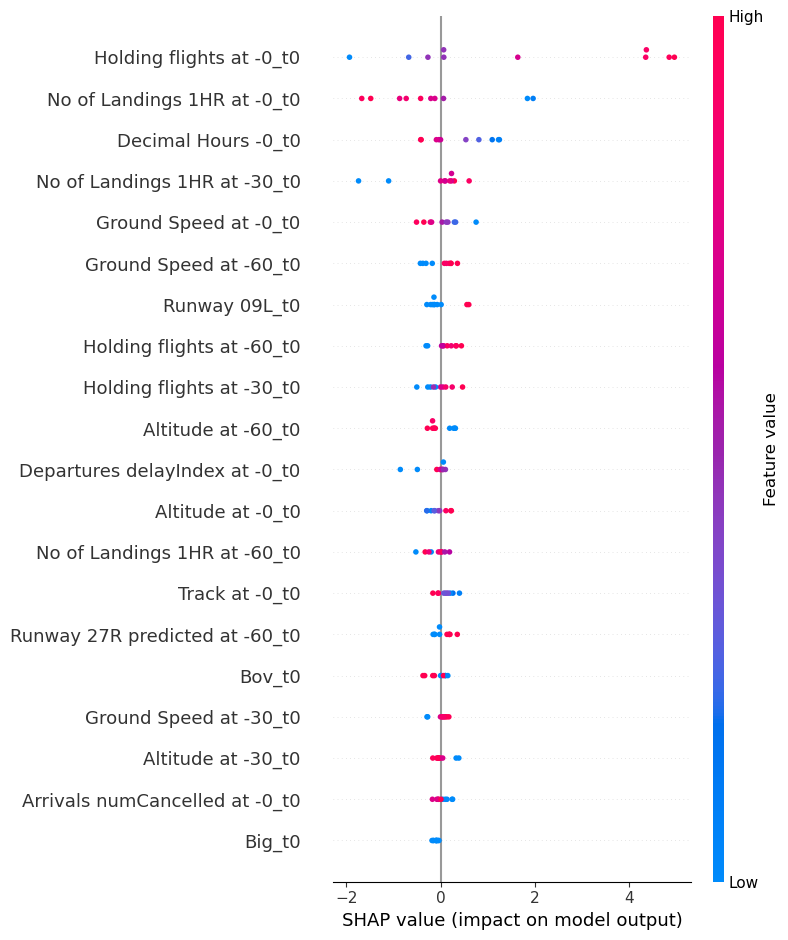

In [27]:
import shap
plt.clf()
#PREPARE FLATTENED DATA FOR SHAP
# LSTM expects 3D input (samples, time_steps, features),
# while KernelExplainer expects 2D (samples, features).

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

#  GENERATE FEATURE NAMES 
# Create descriptive names for each time-step × original feature
# We'll retrieve the original DataFrame columns from X before transformations.
original_features = X.columns.tolist()  # e.g. ["FeatureA", "FeatureB", "FeatureC", ...]

feature_names = []
for t in range(time_steps):
    for fcol in original_features:
        feature_names.append(f"{fcol}_t{t}")

# Double-check length matches the flattened dimension
assert len(feature_names) == X_train_flat.shape[1], \
       f"Expected {X_train_flat.shape[1]} feature names, got {len(feature_names)}"

# DEFINE CUSTOM PREDICT FUNCTION FOR SHAP
def predict_function(flat_data):
    # Unflatten to (samples, time_steps, num_features)
    batch_size = flat_data.shape[0]
    reshaped = flat_data.reshape(
        (batch_size, time_steps, X_train.shape[2])
    )
    return model.predict(reshaped).flatten()

#CREATE KERNEL EXPLAINER
# Use a small random subset of X_train_flat as background data
np.random.seed(42)
idx = np.random.choice(X_train_flat.shape[0], size=50, replace=False)
background_data = X_train_flat[idx]

explainer = shap.KernelExplainer(
    model = predict_function,
    data  = background_data,
    link  = "identity"  # for regression
)

#COMPUTE SHAP VALUES
# For demo, pick the first 10 samples of X_test_flat
test_subset = X_test_flat[:10]

print("Calculating SHAP values on test subset...")
shap_values = explainer.shap_values(test_subset)

# shap_values has shape (num_samples, num_features) => (10, time_steps * n_original_features)
print("SHAP values shape:", np.array(shap_values).shape)

#VISUALIZE SHAP SUMMARY
shap.summary_plot(shap_values, 
                  test_subset, 
                  feature_names=feature_names,
                  show=False)
plt.savefig('plots/LSTM/modelall/Summary_Plot.png')

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step
1394/1394 

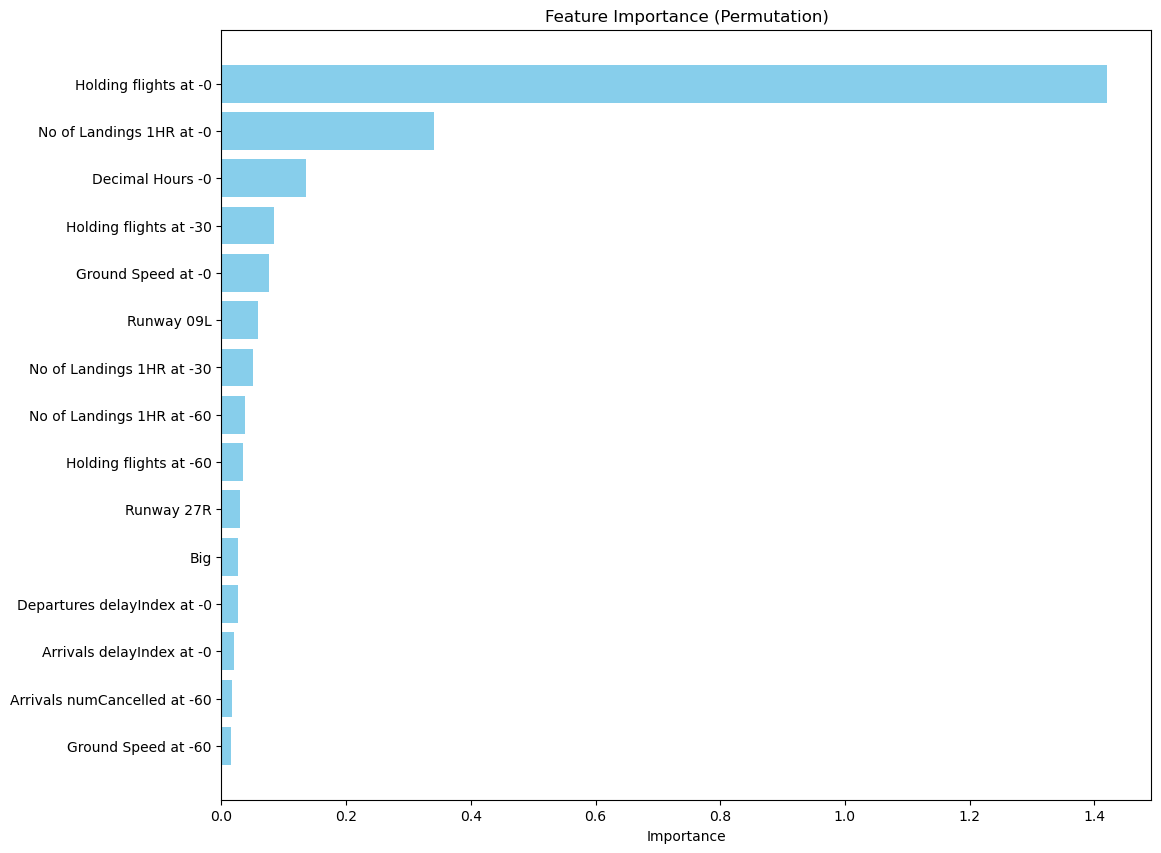

In [29]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
#plt.show()
plt.savefig('LSTM_REG_all_models.png')

In [ ]:
plt.savefig('LSTM_REG_all_models.png')

In [ ]:
plt.show()